# Customer Segmentation - Credit Card

## OBJECTIVE

To Develop a customer segmentation based on their credit card usage in order for the party to define a marketing strategy. 

## DATA

We are given a Dataset of 8950 customers along with 18 behavioural features.

Variables:
1. CUST_ID: Unique Customer Identifier
2. BALANCE: Average Balance (Based on Daily Average Balances)
3. BALANCE FREQUENCY: Ratio of last 12 months with balance
4. PURCHASES : Net Dollar Value of Purchases in last 12 months
5. ONEOFF_PURCHASES: Amount of ONEOFF Purchases
6. INSTALLMENTS_PURCHASES: Total amount of installment purchases
7. CASH_ADVANCE:  Cash Withdrawn From Credit Card (Assume a period of 12 months)
8. PURCHASE_FREQUENCY: Percentage of months with at least one purchase
9. ONEOFF_PURCHASES_FREQUENCY: Freq of ONEOFF purchases
10. PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of Installment Purchases
11. CASH_ADVANCE_FREQUENCY: Cash-Advance frequency
12. CASH_ADVANCE_TRX: Average amount per cash-advance transaction
13. PURCHASES_TRX: Average amount per purchase transaction
14. CREDIT_LIMIT: Credit limit
15. PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
16. MINIMUM_PAYMENTS: Total minimum payments due in the period.
17. PRC_FULL_PAYMENT: Percentage of months with full payment of the due statement balance
18. TENURE: Number of months as a customer

## APPROACH

First, we will derive certain key performance indicators from existing features. Given is the list:
1. Average Transaction Size per month
2. Average Credit Card Usage per month
3. Number of Months with Purchases
4. Number of months with One Off/Installment Purchases




In [2]:
import os
import pandas as pd
import numpy as np

os.chdir("C:/Users/Aditya Kapoor/Desktop/Data Science Upskilling/Project 1 Segmentation/Data")
os.getcwd()

'C:\\Users\\Aditya Kapoor\\Desktop\\Data Science Upskilling\\Project 1 Segmentation\\Data'

In [3]:
#load raw dataset
cc_customer_data_raw_import = pd.read_csv("credit-card-data.csv")
print(cc_customer_data_raw_import.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [5]:
# Create a copy of the imported dataset
cc_data_preprocess = cc_customer_data_raw_import.copy()

In [6]:
# Missing Value Analysis and Imputation

print(cc_data_preprocess.isna().sum(axis=0))

# Impute NaN Values
cc_data_preprocess['CREDIT_LIMIT']= cc_data_preprocess['CREDIT_LIMIT'].fillna(cc_data_preprocess['CREDIT_LIMIT'].median())
cc_data_preprocess['MINIMUM_PAYMENTS'] = cc_data_preprocess['MINIMUM_PAYMENTS'].fillna(cc_data_preprocess['MINIMUM_PAYMENTS'].median())
#QC
cc_data_preprocess.isna().sum(axis=0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
# Data Description
print(cc_data_preprocess.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

### Deriving KPIs

#### KPIs we are interested in:
1. Purchases By Type
2. Payments to Minimum Payments Ratio
3. Balance to Credit Limit Ratio
4. Average Purchase Size
5. Average Cash Advance
6. Average Cash Advance per Month
7. Average Purchase per Month
8. Average Usage per Month
9. Usage
10. Usage per Month
11. One Off Purchases - Installment Purchases


#### Additional metrics we'll need to evaluate the given KPIs

1. Active Purchase Months
2. Average Cash Advance Months:

In [8]:
# Calculating Active Purchase and Cash Advance Months, USAGE, Usage Months

cc_data_preprocess["ACTIVE_PURCHASE_MONTHS"] = cc_data_preprocess["PURCHASES_FREQUENCY"]*cc_data_preprocess["TENURE"]
cc_data_preprocess["ACTIVE_CASH_MONTHS"] = cc_data_preprocess["CASH_ADVANCE_FREQUENCY"]*cc_data_preprocess["TENURE"]
cc_data_preprocess["USAGE"] = cc_data_preprocess["PURCHASES"]+ cc_data_preprocess["CASH_ADVANCE"]


# Calculate Metrics 2-7
cc_data_preprocess["PAY_MINPAY_RATIO"] = cc_data_preprocess["PAYMENTS"]/cc_data_preprocess["MINIMUM_PAYMENTS"]
cc_data_preprocess["BALANCE_CREDITLIMIT_RATIO"] = cc_data_preprocess["BALANCE"]/cc_data_preprocess["CREDIT_LIMIT"]
cc_data_preprocess["AVERAGE_PURCHASE_SIZE"] = cc_data_preprocess["PURCHASES"]/cc_data_preprocess["PURCHASES_TRX"]
cc_data_preprocess["AVERAGE_CASH_SIZE"] = cc_data_preprocess["CASH_ADVANCE"]/cc_data_preprocess["CASH_ADVANCE_TRX"]
cc_data_preprocess["CASH_MONTH"] = cc_data_preprocess["CASH_ADVANCE"]/cc_data_preprocess["ACTIVE_CASH_MONTHS"]
cc_data_preprocess["PURCHASE_MONTH"] = cc_data_preprocess["PURCHASES"]/cc_data_preprocess["ACTIVE_PURCHASE_MONTHS"]
# Usage per month is calculated by dividing it by Tenure, since we do not have Usage Frequency. However, this metric is important
cc_data_preprocess["USAGE_MONTH"] = cc_data_preprocess["USAGE"]/cc_data_preprocess["TENURE"]
cc_data_preprocess["USAGE_MONTH_BALANCE_RATIO"] = cc_data_preprocess["USAGE_MONTH"]/cc_data_preprocess["BALANCE"]
cc_data_preprocess["ONEOFF_INSTALLMENT_RATIO"] = cc_data_preprocess["ONEOFF_PURCHASES"]/cc_data_preprocess["INSTALLMENTS_PURCHASES"]

In [9]:
# dealing inf and NAN values
cc_data_preprocess.loc[cc_data_preprocess["PURCHASES_TRX"]==0,'AVERAGE_PURCHASE_SIZE'] = 0
cc_data_preprocess.loc[cc_data_preprocess["CASH_ADVANCE_TRX"]==0,'AVERAGE_CASH_SIZE'] = 0
cc_data_preprocess.loc[cc_data_preprocess["ACTIVE_CASH_MONTHS"]==0,'CASH_MONTH'] = 0
cc_data_preprocess.loc[cc_data_preprocess["ACTIVE_PURCHASE_MONTHS"]==0,'PURCHASE_MONTH'] = 0
cc_data_preprocess.loc[cc_data_preprocess["BALANCE"]==0,'USAGE_MONTH_BALANCE_RATIO'] = 0
cc_data_preprocess.loc[cc_data_preprocess["INSTALLMENTS_PURCHASES"]==0,'ONEOFF_INSTALLMENT_RATIO'] = 0

# Check NaNs

cc_data_preprocess.isna().sum(axis=0)



CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
ACTIVE_PURCHASE_MONTHS              0
ACTIVE_CASH_MONTHS                  0
USAGE                               0
PAY_MINPAY_RATIO                    0
BALANCE_CREDITLIMIT_RATIO           0
AVERAGE_PURCHASE_SIZE               0
AVERAGE_CASH_SIZE                   0
CASH_MONTH                          0
PURCHASE_MON

In [10]:
def get_usage_type(df):
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0) & (df['CASH_ADVANCE']>0):
        return "OIC"
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0) & (df['CASH_ADVANCE']>0):
        return "IC"
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0) & (df['CASH_ADVANCE']>0):
        return "OC"
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0) & (df['CASH_ADVANCE']==0):
        return "OI"
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0) & (df['CASH_ADVANCE']==0):
        return "O"
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0) & (df['CASH_ADVANCE']==0):
        return "I"
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0) & (df['CASH_ADVANCE']>0):
        return "C"
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0) & (df['CASH_ADVANCE']==0):
        return "NONE"

In [11]:
cc_data_preprocess['USAGE_TYPE'] = cc_data_preprocess.apply(get_usage_type,axis=1)
# Just to check
QC1 =cc_data_preprocess[['USAGE_TYPE','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE']]
QC1.head()

,USAGE_TYPE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,I,0.00,95.4,0.000000
1,C,0.00,0.0,6442.945483
2,O,773.17,0.0,0.000000
3,OC,1499.00,0.0,205.788017
4,O,16.00,0.0,0.000000


In [12]:
# Further Steps::
#Derive 2 datasets. One for insights and the other for processing. In Dataset to be used for further processing,
# drop unnecessary columns as per the previous markdown.
# For insights., dervive more columns. One example is creating HML buckets using a for loop for specific columns

cc_data_preprocess.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'ACTIVE_PURCHASE_MONTHS', 'ACTIVE_CASH_MONTHS', 'USAGE',
       'PAY_MINPAY_RATIO', 'BALANCE_CREDITLIMIT_RATIO',
       'AVERAGE_PURCHASE_SIZE', 'AVERAGE_CASH_SIZE', 'CASH_MONTH',
       'PURCHASE_MONTH', 'USAGE_MONTH', 'USAGE_MONTH_BALANCE_RATIO',
       'ONEOFF_INSTALLMENT_RATIO', 'USAGE_TYPE'],
      dtype='object')

In [14]:
# Lets create buckets to gain insights
cc_insights = cc_data_preprocess.copy()
lis = ['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT','USAGE','AVERAGE_PURCHASE_SIZE', 'AVERAGE_CASH_SIZE']
for i in lis:
    # Ideally we bucket it in Low, Medium and High buckets, but we want to have special buckets for outliers.
    q25,q75 = np.percentile(cc_data_preprocess[i],[25,75])
    iqr = q75-q25
    maxi = q75 + 1.5*iqr
    mini = q25 - 1.5*iqr
    col = i+'_BUCKET'
    cc_insights[col] = np.where(cc_insights[i]<mini,'VL',np.where(cc_insights[i]<q25,'L',np.where(cc_insights[i]<q75,'M',np.where(cc_insights[i]<maxi,'H','VH'))))
    cc_insights[col] = pd.Categorical(cc_insights[col], ["VL", "L", "M","H","VH"])
    
cc_insights[(cc_insights['ONEOFF_PURCHASES']>0) & (cc_insights['INSTALLMENTS_PURCHASES']>0)].head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,ONEOFF_INSTALLMENT_RATIO,USAGE_TYPE,PURCHASES_BUCKET,ONEOFF_PURCHASES_BUCKET,INSTALLMENTS_PURCHASES_BUCKET,CASH_ADVANCE_BUCKET,CREDIT_LIMIT_BUCKET,USAGE_BUCKET,AVERAGE_PURCHASE_SIZE_BUCKET,AVERAGE_CASH_SIZE_BUCKET
6,C10007,627.260806,1.0,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,...,9.301011,OI,VH,VH,H,M,H,VH,H,M
8,C10009,1014.926473,1.0,861.49,661.49,200.00,0.0,0.333333,0.083333,0.250000,...,3.307450,OI,M,H,M,M,H,M,H,M
12,C10013,1516.928620,1.0,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,...,3.483379,OI,VH,VH,H,M,M,H,H,M
13,C10014,921.693369,1.0,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,...,0.244451,OI,H,M,VH,M,H,M,H,M
18,C10019,1989.072228,1.0,504.35,166.00,338.35,0.0,0.666667,0.083333,0.583333,...,0.490616,OI,M,M,M,M,H,M,M,M


## Insights and Reporting



In [15]:
# Now Simply group by each bucket columns and generate summary dataframes/plots wrt relevant variables and draw insights

print(cc_insights.columns)
metrics = [ 'CREDIT_LIMIT',
       'PAY_MINPAY_RATIO', 'BALANCE_CREDITLIMIT_RATIO', 'AVERAGE_PURCHASE_SIZE', 'AVERAGE_CASH_SIZE', 'CASH_MONTH',
       'PURCHASE_MONTH', 'USAGE_MONTH', 'USAGE_MONTH_BALANCE_RATIO','ONEOFF_INSTALLMENT_RATIO' ]

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'ACTIVE_PURCHASE_MONTHS', 'ACTIVE_CASH_MONTHS', 'USAGE',
       'PAY_MINPAY_RATIO', 'BALANCE_CREDITLIMIT_RATIO',
       'AVERAGE_PURCHASE_SIZE', 'AVERAGE_CASH_SIZE', 'CASH_MONTH',
       'PURCHASE_MONTH', 'USAGE_MONTH', 'USAGE_MONTH_BALANCE_RATIO',
       'ONEOFF_INSTALLMENT_RATIO', 'USAGE_TYPE', 'PURCHASES_BUCKET',
       'ONEOFF_PURCHASES_BUCKET', 'INSTALLMENTS_PURCHASES_BUCKET',
       'CASH_ADVANCE_BUCKET', 'CREDIT_LIMIT_BUCKET', 'USAGE_BUCKET',
       'AVERAGE_PURCHASE_SIZE_BUCKET', 'AVERAGE_CASH_SIZE_BUCKET'],
      dtype='object')


              CREDIT_LIMIT  PAY_MINPAY_RATIO  BALANCE_CREDITLIMIT_RATIO  \
USAGE_BUCKET                                                              
VL                     NaN               NaN                        NaN   
L                   2000.0          1.286656                   0.048470   
M                   3000.0          2.620626                   0.279250   
H                   6000.0          2.405039                   0.458589   
VH                  9000.0          4.316352                   0.495762   

              AVERAGE_PURCHASE_SIZE  AVERAGE_CASH_SIZE  CASH_MONTH  \
USAGE_BUCKET                                                         
VL                              NaN                NaN         NaN   
L                         23.584167           0.000000    0.000000   
M                         45.922500           0.000000    0.000000   
H                         55.359512         247.484038  498.618913   
VH                        69.761864         365.004417

Text(0, 0.5, 'Pay to Minimum Pay Ratio')

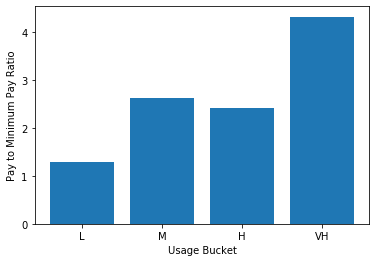

In [16]:
import matplotlib.pyplot as plt
# 1. Metrics by Usage Bucket
metrics_by_usage_bucket = pd.DataFrame(cc_insights.groupby('USAGE_BUCKET')[metrics].median())
print(metrics_by_usage_bucket)
#ONEOFF_INSTALLMENT_RATIO seems to have an interesting trend
plt.bar(['VL','L','M','H','VH'],metrics_by_usage_bucket['PAY_MINPAY_RATIO'])
plt.xlabel('Usage Bucket')
plt.ylabel('Pay to Minimum Pay Ratio')


### Insights Drawn:
1. Useful insights that we observe from Usage Buckets:
    1. Ratio of pay to min pay goes up with Usage. This indicates that customers who use the card more pay more than min            balance.
    2. Also, Balance to CreditLimit ratio and Payment to MinPayment ratio goes up with usage.
    3. Metrics Like Average Monthly Purchase, Cash Advance, Tranaction Size go up with usage as expected.

            CREDIT_LIMIT  PAY_MINPAY_RATIO  BALANCE_CREDITLIMIT_RATIO  \
USAGE_TYPE                                                              
C                 3000.0          1.118858                   0.606633   
I                 2500.0          2.170861                   0.024842   
IC                3000.0          1.099800                   0.668660   
O                 3000.0          2.392582                   0.077179   
OC                3500.0          1.261198                   0.547982   
OI                5000.0          4.837576                   0.132904   
OIC               5000.0          2.059641                   0.519185   

            AVERAGE_PURCHASE_SIZE  AVERAGE_CASH_SIZE  CASH_MONTH  \
USAGE_TYPE                                                         
C                        0.000000         272.970591  466.388244   
I                       33.350000           0.000000    0.000000   
IC                      35.846000         292.507170  538.554978   
O 

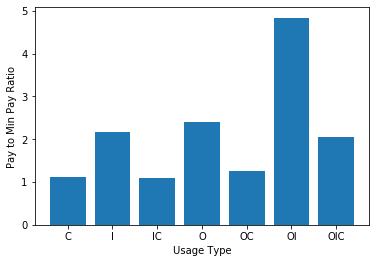

In [17]:
# We'd Like to dive deeper into behavior of people by usage type
metrics_by_usage_type = (pd.DataFrame(cc_insights.groupby('USAGE_TYPE')[metrics].median()))
metrics_by_usage_type.drop(index='NONE',inplace= True)
print(metrics_by_usage_type)
# We see a very dramatic increase in pay_minpay ratio for OI usage_type. We would like to ensure that this is not because of a handful of cases
# lets check the distribution
cc_insights['USAGE_TYPE'].value_counts()
# We see that the sample size is good for all the categories. Lets plot usage type v/s Pay to MinPay ratio
plt.bar(['C','I','IC','O','OC','OI','OIC'],metrics_by_usage_type['PAY_MINPAY_RATIO'])
plt.xlabel('Usage Type')
plt.ylabel('Pay to Min Pay Ratio')
plt.show()

### Insights Drawn:

##### Useful Insights from Usage Type:
1. One of the most dramatic finding from this analysis is that OI Usage Type, that is, people who do not use this credit card for cash advance but use for Installment and One Off payments is very high. If we assume this metric to represent a dimension of compliance, then we see that customer OI, O, OIC and I have a good compliance compared to OC, IC and C. Hence, customers who use heir card more for cash are likely to have a lesser payemnt to min payment ratio.
2. Also, Balance to Credit Limit ratio is quite high for C and IC. OC and OIC have moderately high ratio while I, OI and O have quite low ratios. 
3. Purchase Size is highest in O and OC and lowest in I and IC
4. Usage per month is highest in case of OIC

In [20]:
# Lets now look at Cash Advance Bucket
metrics_by_cash_bucket = (pd.DataFrame(cc_insights.groupby('CASH_ADVANCE_BUCKET')[metrics].median()))
print(metrics_by_cash_bucket.iloc[2:,:])

                     CREDIT_LIMIT  PAY_MINPAY_RATIO  \
CASH_ADVANCE_BUCKET                                   
M                          3000.0          2.257503   
H                          3000.0          1.173567   
VH                         7000.0          1.599023   

                     BALANCE_CREDITLIMIT_RATIO  AVERAGE_PURCHASE_SIZE  \
CASH_ADVANCE_BUCKET                                                     
M                                     0.154367              45.869459   
H                                     0.573772              10.393571   
VH                                    0.578995              18.682961   

                     AVERAGE_CASH_SIZE   CASH_MONTH  PURCHASE_MONTH  \
CASH_ADVANCE_BUCKET                                                   
M                             0.000000     0.000000       74.100896   
H                           338.185919   594.083448       12.557497   
VH                          481.898037  1116.746687       24.276435   

  

### Insights Drawn

##### Useful Insights from Cash Advance Bucket:
1. We see that q25 of Cash Advance is 0. Hence, nobody falls in 'low' category.
2. Credit Limit of of those bucketed 'VH' is more than twice that of others.
3. We see that pay to min pay ratio decreases with increase in Cash Advance Amount.

In [21]:
metrics_by_oneOFF_bucket = (pd.DataFrame(cc_insights.groupby('ONEOFF_PURCHASES_BUCKET')[metrics].median()))
print(metrics_by_oneOFF_bucket.iloc[2:,:])

                         CREDIT_LIMIT  PAY_MINPAY_RATIO  \
ONEOFF_PURCHASES_BUCKET                                   
M                              3000.0          1.606346   
H                              4500.0          3.811627   
VH                             6500.0          7.596705   

                         BALANCE_CREDITLIMIT_RATIO  AVERAGE_PURCHASE_SIZE  \
ONEOFF_PURCHASES_BUCKET                                                     
M                                         0.324903              28.375476   
H                                         0.264571              73.072222   
VH                                        0.260779              94.950000   

                         AVERAGE_CASH_SIZE  CASH_MONTH  PURCHASE_MONTH  \
ONEOFF_PURCHASES_BUCKET                                                  
M                                36.619299   44.052907       37.999991   
H                                 0.000000    0.000000      174.624167   
VH                    

### Insights Drawn

##### Useful Insights from One Off Payment Bucket:
1. Pay to Min Pay ratio is very high for those in 'VH' bucket. This means that those who have a higher number of OneOFF purchases than normal are paying way more than the min due.
2. However, we notice that balance to credit limit ratio is less utilised even among those having very high One Off purchases compared to those who took cash advance.
3. Those falling in 'M' bucket have significantly less One Off to Installment Purchase Ratio. Hence, we could expect them to be having higher installment purchases.

In [22]:
cc_insights.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'ACTIVE_PURCHASE_MONTHS', 'ACTIVE_CASH_MONTHS', 'USAGE',
       'PAY_MINPAY_RATIO', 'BALANCE_CREDITLIMIT_RATIO',
       'AVERAGE_PURCHASE_SIZE', 'AVERAGE_CASH_SIZE', 'CASH_MONTH',
       'PURCHASE_MONTH', 'USAGE_MONTH', 'USAGE_MONTH_BALANCE_RATIO',
       'ONEOFF_INSTALLMENT_RATIO', 'USAGE_TYPE', 'PURCHASES_BUCKET',
       'ONEOFF_PURCHASES_BUCKET', 'INSTALLMENTS_PURCHASES_BUCKET',
       'CASH_ADVANCE_BUCKET', 'CREDIT_LIMIT_BUCKET', 'USAGE_BUCKET',
       'AVERAGE_PURCHASE_SIZE_BUCKET', 'AVERAGE_CASH_SIZE_BUCKET'],
      dtype='object')

## Dimensionality Reduction
#### We have now explored the data enough to gain some valuable insights on customer behavior. We would now like to develop a clustering model. However, before that, we'd like to reduce the number of features we have with the help of dimensionality reduction techniques.

In [23]:
cc_dimensions = cc_data_preprocess.copy()
cc_dimensions.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'ACTIVE_PURCHASE_MONTHS', 'ACTIVE_CASH_MONTHS', 'USAGE',
       'PAY_MINPAY_RATIO', 'BALANCE_CREDITLIMIT_RATIO',
       'AVERAGE_PURCHASE_SIZE', 'AVERAGE_CASH_SIZE', 'CASH_MONTH',
       'PURCHASE_MONTH', 'USAGE_MONTH', 'USAGE_MONTH_BALANCE_RATIO',
       'ONEOFF_INSTALLMENT_RATIO', 'USAGE_TYPE'],
      dtype='object')

In [24]:
# Create dummies out of categorical variables
dummies = pd.get_dummies(cc_dimensions['USAGE_TYPE'])
cc_dimensions_1 =pd.concat([cc_dimensions,dummies],axis=1)
# All Other cols 0 would indicate that it is none
cc_dimensions_1.drop(columns= ['NONE', 'ACTIVE_CASH_MONTHS','ACTIVE_CASH_MONTHS','USAGE_TYPE'],inplace=True)
print(cc_dimensions_1.columns)


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'ACTIVE_PURCHASE_MONTHS', 'USAGE', 'PAY_MINPAY_RATIO',
       'BALANCE_CREDITLIMIT_RATIO', 'AVERAGE_PURCHASE_SIZE',
       'AVERAGE_CASH_SIZE', 'CASH_MONTH', 'PURCHASE_MONTH', 'USAGE_MONTH',
       'USAGE_MONTH_BALANCE_RATIO', 'ONEOFF_INSTALLMENT_RATIO', 'C', 'I', 'IC',
       'O', 'OC', 'OI', 'OIC'],
      dtype='object')


In [25]:
# Set Cust_ID as index
print(len(cc_dimensions_1.columns))
cc_dimensions_1.set_index(['CUST_ID'],drop=True,inplace=True)
cc_dimensions_1.head()

36


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,USAGE_MONTH,USAGE_MONTH_BALANCE_RATIO,ONEOFF_INSTALLMENT_RATIO,C,I,IC,O,OC,OI,OIC
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.194373,0.0,0,1,0,0,0,0,0
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,536.912124,0.167656,0.0,1,0,0,0,0,0,0
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.025822,0.0,0,0,0,1,0,0,0
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,142.065668,0.085239,0.0,0,0,0,0,1,0,0
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.001631,0.0,0,0,0,1,0,0,0


In [26]:
# use minmax scalar to convert all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cc_dimen_scaled = pd.DataFrame(scaler.fit_transform(cc_dimensions_1))
cc_dimen_scaled.columns = cc_dimensions_1.columns
cc_dimen_scaled.head(2)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,USAGE_MONTH,USAGE_MONTH_BALANCE_RATIO,ONEOFF_INSTALLMENT_RATIO,C,I,IC,O,OC,OI,OIC
0,0.002148,0.818182,0.001945,0.0,0.00424,0.000000,0.166667,0.0,0.083333,0.000000,...,0.001923,0.000028,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.168169,0.909091,0.000000,0.0,0.00000,0.136685,0.000000,0.0,0.000000,0.166667,...,0.129904,0.000024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


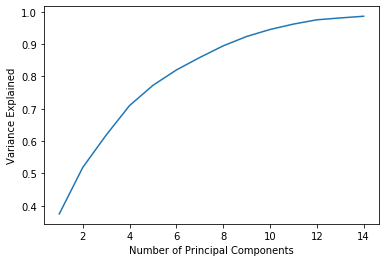

In [37]:
# Using Principal Component Analysis
from sklearn.decomposition import PCA
# Lets see how many components we should take. We use something called explained variance ratio. For all 35 components it should be 100%
var = []
pcomp = list(range(1,15))
for i in pcomp:
    pc=PCA(n_components=i)
    fit_pca=pc.fit(cc_dimen_scaled)
    #print(str(i)+ ' : '+ str(sum(fit_pca.explained_variance_ratio_)))
    var.append(sum(fit_pca.explained_variance_ratio_))

plt.plot(pcomp,var)
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()
    

#### We see that first 10 principal components are explaining roughly 95% of the variance in the data. Hence, we will transform our data with 10 dimensions.

In [239]:
pca = PCA(n_components= 10)
cc_reduced = pd.DataFrame(pca.fit_transform(cc_dimen_scaled))
arr = []
for i in range(1,11):
    arr.append("PC_"+str(i))
cc_reduced.columns = arr
cc_reduced.head()
    

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.316566,0.764652,0.200325,-0.210027,0.165876,-0.100471,0.296373,-0.263952,-0.052643,-0.125270
1,-1.052899,-0.012752,-0.425606,0.008489,-0.155245,0.196935,-0.149643,-0.027715,-0.129321,0.033665
2,0.433795,-0.588645,0.920680,0.003717,-0.493269,0.009155,-0.514656,-0.435381,0.287251,0.250737
3,-0.651205,-0.098186,0.436726,0.001038,0.884011,0.052639,0.165085,0.027500,-0.134569,0.171669
4,-0.632399,-0.162102,0.783121,-0.192600,-0.332333,-0.331651,-0.026644,-0.097972,-0.099073,-0.351612


## Clustering
#### We will use KMeans Clustering Algorithm to segment customers in our database.

### Approach:
1. We will first identify the number of clusters using the Elbow method
2. We will see how well our clusters are able to explain the data. If possible, we will try to label them.
3. We will test our model on a test set to ensure that the model is not overfitting.

In [240]:
from sklearn.cluster import KMeans

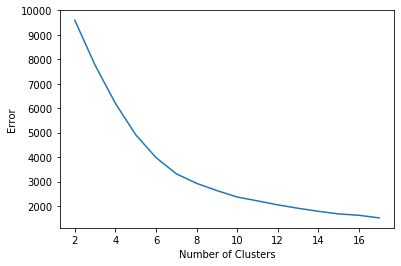

In [242]:
# Elbow Method

n_clust = range( 2, 18 )
errors = []

for i in n_clust:
    clus = KMeans(n_clusters=i,random_state=1024)
    clus.fit(cc_reduced)
    errors.append(clus.inertia_)
    
plt.plot(n_clust,errors)
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show()

In [243]:
from sklearn import metrics

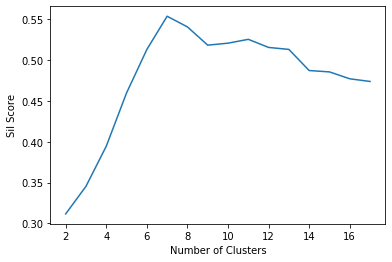

In [245]:
# Elbow method suggests somewhere between 7-9 clusters
sil = []

for i in n_clust:
    clus = KMeans(n_clusters=i, random_state=1024)
    clus.fit(cc_reduced)
    sil_score = metrics.silhouette_score(cc_reduced, clus.labels_)
    sil.append(sil_score)
    
#ploting Sil Score
plt.plot(n_clust,sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Sil Score')
plt.show()

### As per the Silhouette Score, 7 seems to be the best value for n_clusters. 

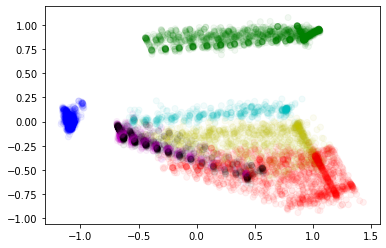

In [252]:
# Plot n_clust (by colors) on PC1 and PC2 axes, 
#try and draw inferences from 7 and then 8 clusters and see which one makes more sense.
model7 = KMeans(n_clusters=7, random_state=1024)
model7.fit(cc_reduced)

colors={0:'r',1:'b',2:'g',3:'y',4:'k',5:'c',6:'m'}
labels=[colors[l] for l in model7.labels_]
plt.scatter(cc_reduced['PC_1'],cc_reduced['PC_2'],c=labels,alpha=0.05)


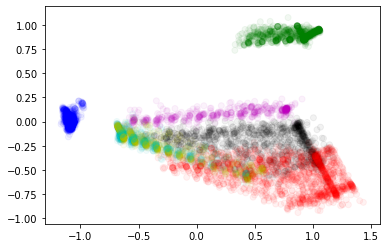

In [253]:
#try with 8 clusters
model8 = KMeans(n_clusters=8, random_state=1024)
model8.fit(cc_reduced)

colors={0:'r',1:'b',2:'g',3:'y',4:'k',5:'c',6:'m',7:'w'}
labels=[colors[l] for l in model8.labels_]
plt.scatter(cc_reduced['PC_1'],cc_reduced['PC_2'],c=labels,alpha=0.05)

In [278]:
# We will now get labels for both the models to see which model gives us better isights.
# preparing dataset and selecting relevant KPI's for comparison

cc_dimensions_1['C7'] = model7.labels_
cc_dimensions_1['C8'] = model8.labels_


# define relevant kpis to compare the clusters

rel_kpi = ['CREDIT_LIMIT','PAY_MINPAY_RATIO','AVERAGE_PURCHASE_SIZE', 'BALANCE',
       'AVERAGE_CASH_SIZE', 'CASH_MONTH', 'PURCHASE_MONTH', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','BALANCE_CREDITLIMIT_RATIO']


cc_dimensions_1.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'ACTIVE_PURCHASE_MONTHS', 'USAGE', 'PAY_MINPAY_RATIO',
       'BALANCE_CREDITLIMIT_RATIO', 'AVERAGE_PURCHASE_SIZE',
       'AVERAGE_CASH_SIZE', 'CASH_MONTH', 'PURCHASE_MONTH', 'USAGE_MONTH',
       'USAGE_MONTH_BALANCE_RATIO', 'ONEOFF_INSTALLMENT_RATIO', 'C', 'I', 'IC',
       'O', 'OC', 'OI', 'OIC', 'C7', 'C8'],
      dtype='object')

In [279]:
# C7 model first
print('MEDIAN:')
print(cc_dimensions_1.groupby('C7')[rel_kpi].median())

print('MEAN:')
print(cc_dimensions_1.groupby('C7')[rel_kpi].mean())

MEDIAN:
    CREDIT_LIMIT  PAY_MINPAY_RATIO  AVERAGE_PURCHASE_SIZE      BALANCE  \
C7                                                                       
0         5000.0          4.837576              61.121200   532.467828   
1         3000.0          1.118858               0.000000  1455.213589   
2         2500.0          2.170861              33.350000    56.091512   
3         5000.0          2.059641              56.334000  2006.680789   
4         3000.0          2.392582              87.793333   245.199649   
5         3000.0          1.097855              35.744667  1629.791663   
6         3500.0          1.261198              80.000000  1601.393425   

    AVERAGE_CASH_SIZE  CASH_MONTH  PURCHASE_MONTH  ONEOFF_PURCHASES  \
C7                                                                    
0            0.000000    0.000000      163.120833            762.50   
1          272.970591  466.388244        0.000000              0.00   
2            0.000000    0.000000       4

## Observations from C7 Model:
#### Cluster 0:
1. Cluster 0 has a very high median Credit Limit and the highest pay to min pay ratio among all the clusters.
2. Median Purchase Size is moderately high while mean purchase size is moderate. One Interesting observation about Cluster 0 is that customers in this segment have not taken any cash advance.
3. Their median purchases/month are high, with one-off purchases getting a greater share than installments.
4. Balance of cluster 0 customers is low as compared to other clusters.
5. Balance to credit limit ratio is moderately low.

#### Cluster 1:
1. The mean of pay to min pay ratio is high while the median is low. This suggests that there clearly are outliers with very high pay to min pay ratio within this cluster. The same is illustrated in the following boxplot.
2. Purchases are zero while average cash size and purchase a month is quite high for this segment. 
3. They have a moderate balance and a high balance to credit limit ratio.


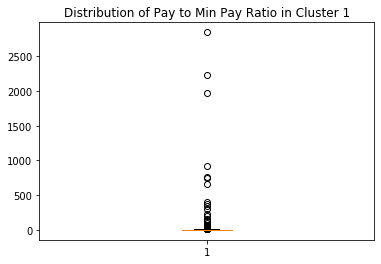

In [274]:
#Histogram to show distribution of pay to min pay ratio in cluster 1
temp1 = cc_dimensions_1.loc[cc_dimensions_1['C7']==1,'PAY_MINPAY_RATIO']
plt.boxplot(temp1)
plt.title('Distribution of Pay to Min Pay Ratio in Cluster 1')
plt.show()

#### Cluster 2
1. Cluster 2 has the lowest credit limit among all the clusters.
2. Just like cluster 1, it has a low median pay to min pay ratio but a much higher mean.
3. Just like cluster 0, customers in this cluster do not have a cash advance transaction. However, the mean and median of      purchases is less than that of cluster 0.
4. Also, unlike cluster zero which has both One Off and Installment transactions, this cluster has no One Off Transactions.
5. This cluster has lowest average balance and balance to credit limit ratio

#### Cluster 3
1. Cluster 3 customers have a high credit limit and pay to min pay ratio.
2. They also have a high cash, one-off and installment transactions as compared to other clusters. 
3. Customers in this clusters seem to be using their credit card more heavily as compared to other customers.
4. They have the highest balance and a high balance to credit limit ratio.

#### Cluster 4
1. They have an average credit limit and an average pay to min pay ratio.
2. Highest average purchase size and low balance.
3. They have high purchase/month, zero installment purchases, zero cash advance and moderate one off purchase. Basically, this segment used crdit card only for One-Off purchases.
4. Balance to credit limit ratio is moderately low.

#### Cluster 5
1. Low Pay to Min Pay ratio, average crdit limit and low average purchase size.
2. High Balance
3. Average Cash and Cash/Month metrics are high and purchase metrics are low.
4. They have zero One Off Purchases and comparatively low installment purchases.
5. Balance to credit limit ratio is the highest.

#### Cluster 6
1. Pay to Min Pay ratio is moderately low.
2. Average Purchase Size and Balance is high.
3. Moderate Cash per month and low purchase and one off purchases a month.
4. Zero Installment Purchases and High Balance to Credit Limit Ratio.

In [281]:
# Let us now make a model with 8 clusters.
print('MEDIAN:')
print(cc_dimensions_1.groupby('C8')[rel_kpi].median())

print('MEAN:')
print(cc_dimensions_1.groupby('C8')[rel_kpi].mean())


MEDIAN:
    CREDIT_LIMIT  PAY_MINPAY_RATIO  AVERAGE_PURCHASE_SIZE      BALANCE  \
C8                                                                       
0         5000.0          4.837576              61.121200   532.467828   
1         3000.0          1.118858               0.000000  1455.213589   
2         2000.0          2.304347              33.003333    73.945889   
3         3000.0          2.392582              87.793333   245.199649   
4         5000.0          2.059641              56.334000  2006.680789   
5         3500.0          1.261198              80.000000  1601.393425   
6         3000.0          1.099800              35.846000  1630.991993   
7         2500.0          1.996425              34.858667    30.898879   

    AVERAGE_CASH_SIZE  CASH_MONTH  PURCHASE_MONTH  ONEOFF_PURCHASES  \
C8                                                                    
0            0.000000    0.000000      163.120833            762.50   
1          272.970591  466.388244     

In [303]:
(cc_dimensions_1.groupby('C8')[rel_kpi].median())


,CREDIT_LIMIT,PAY_MINPAY_RATIO,AVERAGE_PURCHASE_SIZE,BALANCE,AVERAGE_CASH_SIZE,CASH_MONTH,PURCHASE_MONTH,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,BALANCE_CREDITLIMIT_RATIO
C8,,,,,,,,,,
0,5000.0,4.837576,61.121200,532.467828,0.000000,0.000000,163.120833,762.50,534.520,0.132904
1,3000.0,1.118858,0.000000,1455.213589,272.970591,466.388244,0.000000,0.00,0.000,0.606633
2,2000.0,2.304347,33.003333,73.945889,0.000000,0.000000,42.823174,0.00,456.835,0.035694
3,3000.0,2.392582,87.793333,245.199649,0.000000,0.000000,134.280537,443.25,0.000,0.077179
4,5000.0,2.059641,56.334000,2006.680789,225.473003,418.484173,145.888333,611.65,444.960,0.519185
5,3500.0,1.261198,80.000000,1601.393425,242.947798,408.484181,127.600051,293.26,0.000,0.547982
6,3000.0,1.099800,35.846000,1630.991993,292.507170,538.554978,48.131667,0.00,336.000,0.668660
7,2500.0,1.996425,34.858667,30.898879,0.000000,0.000000,40.399995,0.00,159.220,0.012194


In [304]:
os.chdir("C:/Users/Aditya Kapoor/Desktop/Data Science Upskilling/Project 1 Segmentation/Exports")
(cc_dimensions_1.groupby('C8')[rel_kpi].median()).to_csv('c8_median.csv')
(cc_dimensions_1.groupby('C8')[rel_kpi].mean()).to_csv('c8_mean.csv')

(cc_dimensions_1.groupby('C7')[rel_kpi].median()).to_csv('c7_median.csv')
(cc_dimensions_1.groupby('C7')[rel_kpi].mean()).to_csv('c7_mean.csv')

## Cluster Insights with C8



#### Cluster 0:
1. Credit Limit, Average Purchase Size and Pay to Min Pay Ratio is quite high for this group is high.
2. Average Balance for this group is moderately low and average cash advance is 0.
3. Purchase per month is high with one-off purchases getting more share than installments.
4. Balance to Cred Limit ratio is low.



#### Cluster 1:
1. Credit Limit is moderatly low. Mean of pay to min pay ratio is high while the median is low. Indicates that there are a lot of outliers in this cluster with regards to pay to min pay ratio.
2. Balance is High and there are no purchase trnasactions. Cash Transactions are quite high.
3. Balance to credit limit ratio is quite high.



#### Cluster 2:
1. This cluster has low credit limit. Like Cluster 1, they have a moderate pay to min pay median but a very high mean.
2. Average Purchase size is low and so is purchase per month and balance.
3. There are no cash advance transactions.
4. One Off purchases are zero and installment purchases are moderately high.
5. Balance to Credit Limit Ratio is low.
6. These are customers who only use their credit card for installment purchases. Their overall usage is quite low.



#### Cluster 3:
1. Credit Limit for customers in this segment is moderately low.
2. Average purchase size and purchases per month metrics are very high, all which are one off purchases.
3. No cash advance/installment transaction.
4. Balance is moderarely low.
5. Balance to credit limit ratio is low.



#### Cluster 4:
1. Credit Limit is high and pay to min pay ratio is moderate.
2. Average purchase size is moderate and balance is very high.
3. Metrics like Average Cash Size, Cash per Month and purchase per month are moderate.
4. One off Purchases and installment purchases are both high.
5. High Balance to Credit Limit Ratio.



#### Cluster 5:
1. Credit Limit is moderately high and pay to min pay ratio is low.
2. Average Purchase Size, Balance and purchase per month metrics are high.
3. Average Cash Size and Cash per month are moderate.
4. One off purchases are moderately low and there are no installment purchases.
5. Balance to credit limit ratio is high.



#### Cluster 6:
1. Credit Limit and Pay to Min Pay ratio are moderately low.
2. Average purchase size and purchase per month are low.
3. Balance, Average Cash Size and Cash Advance amounts are high.
4. No one off transactions and installment purcases are moderately low.
5. Balance to credit limit ratio is high.



#### Cluster 7:
1. Credit Limit is low.
2. Mean of Pay to Min Pay ratio is high while the median is low because of outliers within the cluster.
3. Average Purchase Size, purchase a month, balance and installment purchases are low. No one off purchases.
4. Balance to Credit Limit Ratio is low
5. No Cash Transactions.





### Lets see the difference between C7 and C8

In [308]:
# Lets see their value counts
print(cc_dimensions_1['C7'].value_counts())
print(cc_dimensions_1['C8'].value_counts())
# for C7, 1,0, are intact. change in 2 to create 7

1    2041
2    1799
0    1757
4    1071
3    1017
6     803
5     462
Name: C7, dtype: int64
1    2041
0    1757
2    1074
3    1071
4    1017
5     803
7     726
6     461
Name: C8, dtype: int64


#### It looks like Clusters 0,1 are exactly the same and clusters 3 and 4 & 5 and 6 have interchanged names in C7 and C8. One record from cluster 5 of C7 model and 725 records from cluster 2 have been removed to form cluster 7 of C8. However, we arent sure at this point. We'll need to verify.

In [309]:
pd.crosstab(np.array(cc_dimensions_1['C7']),np.array(cc_dimensions_1['C8']))

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,1757,0,0,0,0,0,0,0
1,0,2041,0,0,0,0,0,0
2,0,0,1074,0,0,0,0,725
3,0,0,0,0,1017,0,0,0
4,0,0,0,1071,0,0,0,0
5,0,0,0,0,0,0,461,1
6,0,0,0,0,0,803,0,0


### This proves that our intuition was correct. This means that cluster 2 in C7 broke up to make clusters 2 and 7 in C8. Let us now check what is the difference between C7 Cluster 2 and C8 clusters 2,7

#### We observe that there isnt much difference between Cluster 2 and 7 of C8 model. Both the clusters are similar to Cluster 2 of C7 model. Hence, we will go ahead with C7 Model

##  Summary of C7 Clusters:


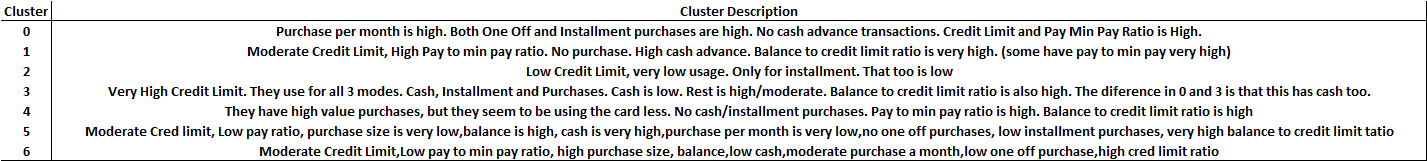




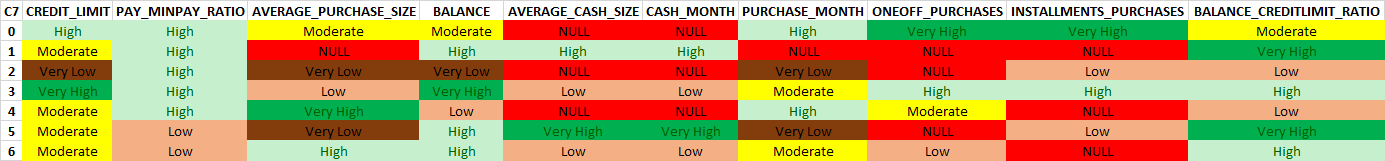


# Recommendations

1. **High Flyers (Cluster 0)**: They are important customers. They are very active credit card users and do not use their card for cash advance. Also, their balance to credit limit ratio is moderate. They must be given good offers so that they are encouraged to use their card more. They could be given offers on Cash Advance as their profile seems strong and they are less likely to default. Their credit limit could also be increased.

2. **Non Swiping (Cluster 1)**: They are high risk customers as they only use their cards for Cash Advance. They have never used their credit card for purchases. Their Balance to Credit Limit Ratio is also quite high. They should be given more information on benefits of using credit card for purchases and if possible, also encouraged to do so through good offers.

3. **Inactive (Cluster 2)**: These are highly inactive customers. Their purchase size/ purchase per month is very low. They only use their credit cards for installment purchases and that too isnt much. Also, we observe that their credit limit is quite low. This could be because of a poor credit score. They must be made aware about the benefits of a good credit score, and how swiping their card more and timely payments can earn them one. This group of customers must be targeted for awareness and financial education.

4. **Heavy Users (Cluster 3)**: They are as good as High Flyers. The only difference is that they use cash advance facility too. However, that should not be a concern as they tend to use their card more for purchases. However, they have less one off and installment purchases compared to high flyers. They should be targeted with better offers on One Off Payments.

5. **High Potential (Cluster 4)**: They have a high pay to min pay ratio and their purchase size is good. Despite that, they lag behind the high flyers and Heavy Users in total purchase. Marketing Campaign for them could focus on offers that motivate them to do more one off transactions. If required, their credit limit could be enhanced too. Communications regarding offers on installment purchases should also be sent to them. Focus should be to convert them to Heavy Users/High Flyers.

6. **Cash Affine (Cluster 5)**: They are much like Non Swiping customers. However, they have better credit limit, so they seem to be at lesser risk to default. Their cash advance transactions are higher then Non Swiping customers and pay to min pay ratio is low. They must be targeted to use their cad more for One Off purchases through offers/communication.

7. **Low Potential (Cluster 6)**: They differ with inactive customers in a way that their balance to credit limit ratio is high and pay to min pay ratio is low. They have no installment purchases and most of their transactions are either cash/one off. This, with a low pay to min pay puts them at a risk of defaulting. They must be encouraged to make full payments through extra card points or discounts.

In [310]:
# In the final step, we would like to export a csv file with our custom cluster name. We will take the same raw file that we imported.
segmented_cc_cust = cc_customer_data_raw_import.copy()

# create a dictionary of cluster numbers and names

seg = {0:'High Flyers',1:'Non Swiping',2:'Inactive',3:'Heavy Users',4:'High Potential',5:'Cash Affine',6:'Low Potential'}

In [315]:
segmented_cc_cust['CUSTOMER_SEGMENT'] = cc_dimensions_1['C7'].reset_index(drop=True)

In [318]:
# Map Segment Names to Cluster Numbers
segmented_cc_cust['CUSTOMER_SEGMENT']= segmented_cc_cust['CUSTOMER_SEGMENT'].map(seg)

In [324]:
# Export the output file

segmented_cc_cust.to_csv('Credit Card Customer Segmentation.csv', index= False)